In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('../input/av-healthcare-analytics-ii/healthcare/train_data.csv')
test = pd.read_csv('../input/av-healthcare-analytics-ii/healthcare/test_data.csv')

In [3]:
train

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [4]:
train['Stay'].unique()
target_dict = {'0-10':0,'11-20':1,'21-30':2,'31-40':3,'41-50':4,'51-60':5,'61-70':6,'71-80':7,'81-90':8,'91-100':9,'More than 100 Days':10}
train['Stay'] = train['Stay'].replace(target_dict)

In [5]:
train['type'] = 0
test['type'] = 1
test['Stay'] = 0

In [6]:
master = pd.concat([train,test],axis = 0)
master

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,type
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,4,0
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,3,0
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,4,0
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,0,1
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,0,1
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,0,1
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,0,1


In [7]:
master.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             148
patientid                               0
City_Code_Patient                    6689
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
type                                    0
dtype: int64

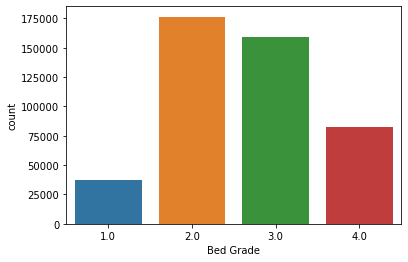

In [8]:
sns.countplot(master['Bed Grade'])

In [9]:
master['Bed Grade'].fillna(master['Bed Grade'].median(), inplace = True)

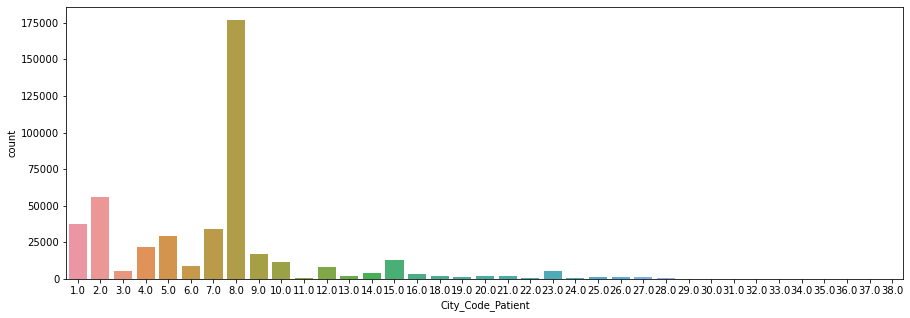

In [10]:
fig = plt.figure(figsize = (15,5))
fig = sns.countplot(master['City_Code_Patient'])

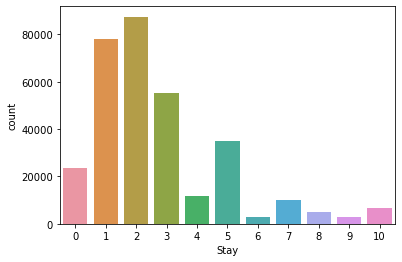

In [11]:
sns.countplot(train['Stay'])

In [12]:
lstStayDist=np.array(train['Stay'].value_counts()/train['Stay'].count())
#print(lstStayDist)
#test_dist = lstStayDist*test['Stay'].count()

In [13]:
lstStayDist.sum()

1.0

In [14]:
master['City_Code_Patient'].fillna(master['City_Code_Patient'].mode()[0], inplace = True)

In [15]:
master.nunique()

case_id                              455495
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed Grade                                 4
patientid                            131624
City_Code_Patient                        37
Type of Admission                         3
Severity of Illness                       3
Visitors with Patient                    29
Age                                      10
Admission_Deposit                      7634
Stay                                     11
type                                      2
dtype: int64

In [16]:
master

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,type
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,4,0
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,3,0
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,4,0
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,0,1
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,0,1
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,0,1
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,0,1


In [17]:
master = master.set_index('case_id')

In [18]:
master.index.name = None
master

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,type
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0,0
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,4,0
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,3,0
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,4,0
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,0,1
455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,0,1
455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,0,1
455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,0,1


In [19]:
le = LabelEncoder()
categorical_columns = ['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission','Severity of Illness']
for col in categorical_columns:
    master[col] = le.fit_transform(master[col])

In [20]:
master['Age'] = master['Age'].str.findall(r'(\d).*')
master['Age'] = master['Age'].apply(lambda x: int(x[0]))
master

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,type
1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911.0,0,0
2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954.0,4,0
3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745.0,3,0
4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272.0,4,0
5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455491,11,1,2,1,4,1,1,3,3.0,41160,3.0,0,1,4,4,6313.0,0,1
455492,25,4,1,0,2,3,2,4,4.0,30985,7.0,0,2,2,0,3510.0,0,1
455493,30,2,3,2,2,1,2,0,4.0,81811,12.0,2,1,2,0,7190.0,0,1
455494,5,0,1,0,2,1,2,4,4.0,57021,10.0,1,1,2,4,5435.0,0,1


In [21]:
master.nunique()

Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed Grade                                 4
patientid                            131624
City_Code_Patient                        37
Type of Admission                         3
Severity of Illness                       3
Visitors with Patient                    29
Age                                      10
Admission_Deposit                      7634
Stay                                     11
type                                      2
dtype: int64

In [22]:
def create_aggregates_count(df,colagg,coltar,nsuffix):

    dfAg=df.dropna (subset=[coltar]).groupby (by=colagg).agg({coltar:['count']})

    lstColsAg=dfAg.reset_index().columns.to_list() 
    print(lstColsAg)                                                           
    colsAg=[] 
    for n1 in range (len(lstColsAg)):
        if len(lstColsAg[n1][1])>0:
            colname=lstColsAg[n1][0]+"_"+lstColsAg[n1][1]+"_"+str(nsuffix)+str(len(colagg))
            colsAg.append(colname) 
    dfAg.columns=colsAg 
    dfAg=dfAg.reset_index() 
    df=df.merge(dfAg, how='left', on=colagg) 
    return df

In [23]:
master.columns

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'type'],
      dtype='object')

In [24]:
coltar = 'patientid'
colsagg = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade','City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age']
n = 0
for colagg in colsagg:
    master = create_aggregates_count(master,colagg,coltar,n)
    n = n+1
master

[('Hospital_code', ''), ('patientid', 'count')]
[('Hospital_type_code', ''), ('patientid', 'count')]
[('City_Code_Hospital', ''), ('patientid', 'count')]
[('Hospital_region_code', ''), ('patientid', 'count')]
[('Available Extra Rooms in Hospital', ''), ('patientid', 'count')]
[('Department', ''), ('patientid', 'count')]
[('Ward_Type', ''), ('patientid', 'count')]
[('Ward_Facility_Code', ''), ('patientid', 'count')]
[('Bed Grade', ''), ('patientid', 'count')]
[('City_Code_Patient', ''), ('patientid', 'count')]
[('Type of Admission', ''), ('patientid', 'count')]
[('Severity of Illness', ''), ('patientid', 'count')]
[('Visitors with Patient', ''), ('patientid', 'count')]
[('Age', ''), ('patientid', 'count')]


,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,...,patientid_count_433,patientid_count_510,patientid_count_69,patientid_count_718,patientid_count_89,patientid_count_917,patientid_count_1017,patientid_count_1119,patientid_count_1221,patientid_count_133
0,8,2,3,2,3,3,2,5,2.0,31397,...,130755,41033,182939,161470,176451,33958,168363,81195,197734,69506
1,2,2,5,2,2,3,3,5,2.0,31397,...,140895,41033,111166,161470,176451,33958,217672,81195,197734,69506
2,10,4,1,0,2,1,3,4,2.0,31397,...,140895,42358,111166,79058,176451,33958,217672,81195,197734,69506
3,26,1,2,1,2,3,2,3,2.0,31397,...,140895,41033,182939,74312,176451,33958,217672,81195,197734,69506
4,26,1,2,1,2,3,3,3,2.0,31397,...,140895,41033,111166,74312,176451,33958,217672,81195,197734,69506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455490,11,1,2,1,4,1,1,3,3.0,41160,...,131191,42358,152046,74312,159090,5401,168363,122735,113497,91495
455491,25,4,1,0,2,3,2,4,4.0,30985,...,140895,41033,182939,79058,82387,33958,168363,251565,197734,9140
455492,30,2,3,2,2,1,2,0,4.0,81811,...,140895,42358,182939,40260,82387,8124,69460,122735,197734,9140
455493,5,0,1,0,2,1,2,4,4.0,57021,...,140895,42358,182939,79058,82387,11809,217672,122735,197734,91495


In [25]:
cols_ignore = ['type']
cols_y = ['Stay']
cols_X = list(set(master.columns) - set(cols_y) - set(cols_ignore))

In [26]:
X = master[cols_X][master['type']==0]
y = master[cols_y][master['type']==0]

In [27]:
X_test = master[cols_X][master['type']==1]

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.33, random_state=0)

In [29]:
y_test_list = []
for train_index, val_index in sss.split(X, y):
    print("TRAIN:", train_index, "val:", val_index)
    X_train, X_val = X.iloc[train_index,:], X.iloc[val_index,:]
    y_train, y_val = y.iloc[train_index,], y.iloc[val_index,]
    clf = lgb.LGBMClassifier(num_bjbjmleaves = 31,learning_rate = 0.01,
                         n_estimators = 3000,objective = 'multiclass', num_class = 11,
                         reg_lambda = 3, silent = False).fit(X_train,np.array(y_train).reshape(-1,1))
    y_preds = clf.predict(X_val)
    y_temp = clf.predict(X_test)
    y_test_list.append(y_temp)
    acc = accuracy_score(y_val,y_preds)
    print(acc)
print(pd.DataFrame(y_test_list))

TRAIN: [312896  74828 252729 ... 168902 157778 248964] val: [141978 199679 254581 ... 151320 242456 269441]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.4274920302612171
TRAIN: [ 84059 207136 288199 ... 311215 192382 243271] val: [193580  30547 156970 ... 128136 244520 234198]
0.42558880905933294
TRAIN: [100754 189035  30345 ... 219482  91047 181381] val: [287467 178789 312815 ... 134280  36933 255515]
0.42440881191416474
TRAIN: [313697 162679 314557 ... 153662  11158 149890] val: [257306 304097 259089 ...  17989 122647 170782]
0.42635961364609604
TRAIN: [198318 163123 256336 ... 225191  71334 182834] val: [289894 243837  61866 ... 181507 140527 303594]
0.42782509397154683
   0       1       2       3       4       5       6       7       8       \
0       0       5       2       2       5       2       2       2       2   
1       0       5       2       2       5       2       2       1       2   
2       0       5       2       2       5       2       2       1       2   
3       0       5       2       2       5       2       2       1       2   
4       0       5       2       2       5       2       2       1       2   

   9  

In [30]:
thresholds = [0.5,1.2,2.2,3.3,]
y_test_df = pd.DataFrame(y_test_list)
y_test_df = y_test_df.T
y_test_df['case_id'] = test['case_id']
y_test_df = y_test_df.set_index('case_id')
y_test_df['Mean']= y_test_df.mean(axis = 1)
#y_test_df['Stay'] = np.where(y_test_df['Mean']>2.4,4,
                             ##np.where(y_test_df['Mean']>1.3,2,
                                      #np.where(y_test_df['Mean']>0.7,1,0)))
y_test_df['Stay'] = y_test_df[4]

TypeError: 'method' object is not subscriptable

In [ ]:
target_keys = dict(map(reversed, target_dict.items()))
sub_df = y_test_df[['Stay']]
sub_df['Stay'] = sub_df['Stay'].replace(target_keys)
sub = sub_df.to_csv('sub.csv',index = True)
sub_df